<a href="https://colab.research.google.com/github/albertoalvarezz/albertoalvarezz-DataScience-GenAI-Submissions/blob/main/Assingment_5/5_02_Modelling_Hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](https://drive.google.com/uc?export=view&id=1xqQczl0FG-qtNA2_WQYuWePW9oU8irqJ)

# 5.02 Modelling Hackathon
We'll get a chance in this seminar to practice for the in-class test, and also to put what we have learned into practice.

To speed things up, I have done the data/feature engineering for you, you will just need to build it into a data science model. As before, you can use the code from [GitHub](https://github.com/MJMortensonWarwick/IB2AD0_Data_Science_GenerativeAI), from the internet, and/or use the Gemini AI tools.

This is an artificial dataset, and we will be predicting if students achieve a passing grade, which we will call anything above a "D".

We'll start by importing the data:

In [ ]:
from google.colab import files
upload = files.upload()

Saving students_two.csv to students_two.csv


Now we will get the data into Pandas and inspect it:

In [ ]:
import pandas as pd
df = pd.read_csv("students_two.csv")

df.head()

,Id,Student_Age,High_School_Type,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade
0,5001,21,Other,50%,Yes,No,Private,0,Always,Yes,Yes,No,No,AA
1,5002,20,Other,50%,Yes,No,Private,0,Always,Yes,No,Yes,Yes,AA
2,5003,21,State,50%,No,No,Private,2,Never,No,No,No,Yes,AA
3,5004,18,Private,50%,Yes,No,Bus,2,Always,No,Yes,No,No,AA
4,5005,22,Private,50%,No,No,Bus,12,Always,Yes,No,Yes,Yes,AA


Let's check for missing values:

In [ ]:
df.isnull().sum()

,0
Id,0
Student_Age,0
High_School_Type,0
Scholarship,1
Additional_Work,0
Sports_activity,0
Transportation,0
Weekly_Study_Hours,0
Attendance,0
Reading,0


Only one missing value. Let's just drop it out of laziness:

In [ ]:
df.dropna(inplace=True)
df.isnull().sum()

,0
Id,0
Student_Age,0
High_School_Type,0
Scholarship,0
Additional_Work,0
Sports_activity,0
Transportation,0
Weekly_Study_Hours,0
Attendance,0
Reading,0


We have an ID column we know won't be predictive ... so let's drop it:

In [ ]:
df = df.drop(["Id"], axis=1)
df.head()

,Student_Age,High_School_Type,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade
0,21,Other,50%,Yes,No,Private,0,Always,Yes,Yes,No,No,AA
1,20,Other,50%,Yes,No,Private,0,Always,Yes,No,Yes,Yes,AA
2,21,State,50%,No,No,Private,2,Never,No,No,No,Yes,AA
3,18,Private,50%,Yes,No,Bus,2,Always,No,Yes,No,No,AA
4,22,Private,50%,No,No,Bus,12,Always,Yes,No,Yes,Yes,AA


Next we will convert some of the text features to numbers:

In [ ]:
# High school
print(df['High_School_Type'].unique())

['Other' 'State' 'Private']


We can't easily convert these to a number range. Instead we should use one-hot encoding:

In [ ]:
df = pd.get_dummies(df, columns=['High_School_Type'], drop_first=True, dtype=int)
df.head()

,Student_Age,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade,High_School_Type_Private,High_School_Type_State
0,21,50%,Yes,No,Private,0,Always,Yes,Yes,No,No,AA,0,0
1,20,50%,Yes,No,Private,0,Always,Yes,No,Yes,Yes,AA,0,0
2,21,50%,No,No,Private,2,Never,No,No,No,Yes,AA,0,1
3,18,50%,Yes,No,Bus,2,Always,No,Yes,No,No,AA,1,0
4,22,50%,No,No,Bus,12,Always,Yes,No,Yes,Yes,AA,1,0


We have converted this to two columns (on the far right) - "High_School_Type_Private" and "High_School_Type_State". We do not need the "Other" type as if the student is "Other" then both "Private" and "State" will be 0 (a unique combination). This is controlled by the command _drop\_first=True_. We also specify the data type (_dtype_) as __int__ so we return 0s and 1s rather than True and False.

Next we can look at Scholarship. It needs to be converted from a text representation of a percentage to a number:

In [ ]:
df['Scholarship'] = df['Scholarship'].str.replace('%', '').astype(float) / 100
df.head()

,Student_Age,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade,High_School_Type_Private,High_School_Type_State
0,21,0.5,Yes,No,Private,0,Always,Yes,Yes,No,No,AA,0,0
1,20,0.5,Yes,No,Private,0,Always,Yes,No,Yes,Yes,AA,0,0
2,21,0.5,No,No,Private,2,Never,No,No,No,Yes,AA,0,1
3,18,0.5,Yes,No,Bus,2,Always,No,Yes,No,No,AA,1,0
4,22,0.5,No,No,Bus,12,Always,Yes,No,Yes,Yes,AA,1,0


"Additional_Work" is next:

In [ ]:
# Additional work
print(df['Additional_Work'].unique())

['Yes' 'No']


Two values, so we can convert to 0 and 1:

In [ ]:
df['Additional_Work'] = df['Additional_Work'].map({'Yes': 1, 'No': 0})
df.head()

,Student_Age,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade,High_School_Type_Private,High_School_Type_State
0,21,0.5,1,No,Private,0,Always,Yes,Yes,No,No,AA,0,0
1,20,0.5,1,No,Private,0,Always,Yes,No,Yes,Yes,AA,0,0
2,21,0.5,0,No,Private,2,Never,No,No,No,Yes,AA,0,1
3,18,0.5,1,No,Bus,2,Always,No,Yes,No,No,AA,1,0
4,22,0.5,0,No,Bus,12,Always,Yes,No,Yes,Yes,AA,1,0


Let's speed up now:

In [ ]:
categorical_cols = ['Sports_activity', 'Transportation', 'Attendance', 'Reading', 'Notes', 'Listening_in_Class', 'Project_work', 'Grade']

for col in categorical_cols:
    print(f"Unique values for '{col}': {df[col].unique()}")

Unique values for 'Sports_activity': ['No' 'Yes']
Unique values for 'Transportation': ['Private' 'Bus']
Unique values for 'Attendance': ['Always' 'Never' 'Sometimes' '3']
Unique values for 'Reading': ['Yes' 'No']
Unique values for 'Notes': ['Yes' 'No' '6']
Unique values for 'Listening_in_Class': ['No' 'Yes' '6']
Unique values for 'Project_work': ['No' 'Yes']
Unique values for 'Grade': ['AA' 'BA' 'CC' 'Fail' 'BB' 'CB' 'DD' 'DC']


The values of '6' in 'Notes' and 'Listening_in_Class' make no sense, and neither do '3' for 'Attendance'. We'll be lazy and drop these rows (really we should check with an SME):

In [ ]:
df = df[(df['Notes'] != '6') & (df['Listening_in_Class'] != '6') & (df['Attendance'] != '3')]
df.head()

,Student_Age,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade,High_School_Type_Private,High_School_Type_State
0,21,0.5,1,No,Private,0,Always,Yes,Yes,No,No,AA,0,0
1,20,0.5,1,No,Private,0,Always,Yes,No,Yes,Yes,AA,0,0
2,21,0.5,0,No,Private,2,Never,No,No,No,Yes,AA,0,1
3,18,0.5,1,No,Bus,2,Always,No,Yes,No,No,AA,1,0
4,22,0.5,0,No,Bus,12,Always,Yes,No,Yes,Yes,AA,1,0


Now we can convert all those "Yes" / "No" columns to 0 and 1.

In [ ]:
binary_cols = ['Sports_activity', 'Reading', 'Notes', 'Listening_in_Class', 'Project_work']

for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

df.head()

,Student_Age,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade,High_School_Type_Private,High_School_Type_State
0,21,0.5,1,0,Private,0,Always,1,1,0,0,AA,0,0
1,20,0.5,1,0,Private,0,Always,1,0,1,1,AA,0,0
2,21,0.5,0,0,Private,2,Never,0,0,0,1,AA,0,1
3,18,0.5,1,0,Bus,2,Always,0,1,0,0,AA,1,0
4,22,0.5,0,0,Bus,12,Always,1,0,1,1,AA,1,0


We can also do this with "Transportation":

In [ ]:
df['Transportation'] = df['Transportation'].map({'Private': 1, 'Bus': 0})
df.head()

,Student_Age,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade,High_School_Type_Private,High_School_Type_State
0,21,0.5,1,0,1,0,Always,1,1,0,0,AA,0,0
1,20,0.5,1,0,1,0,Always,1,0,1,1,AA,0,0
2,21,0.5,0,0,1,2,Never,0,0,0,1,AA,0,1
3,18,0.5,1,0,0,2,Always,0,1,0,0,AA,1,0
4,22,0.5,0,0,0,12,Always,1,0,1,1,AA,1,0


For Attendance an ordinal range makes sense:

In [ ]:
df['Attendance'] = df['Attendance'].map({'Never': 0, 'Sometimes': 1, 'Always': 2})
df.head()

,Student_Age,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade,High_School_Type_Private,High_School_Type_State
0,21,0.5,1,0,1,0,2,1,1,0,0,AA,0,0
1,20,0.5,1,0,1,0,2,1,0,1,1,AA,0,0
2,21,0.5,0,0,1,2,0,0,0,0,1,AA,0,1
3,18,0.5,1,0,0,2,2,0,1,0,0,AA,1,0
4,22,0.5,0,0,0,12,2,1,0,1,1,AA,1,0


This just leaves the target - 'Grade'. To make the problem binary we'll convert 'Fail' and any grade that includes a 'D' as 0 (for fail) and the rest as 1 (pass):

In [ ]:
df['Grade'] = df['Grade'].apply(lambda x: 0 if x == 'Fail' or 'D' in x else 1)
df.head()

,Student_Age,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade,High_School_Type_Private,High_School_Type_State
0,21,0.5,1,0,1,0,2,1,1,0,0,1,0,0
1,20,0.5,1,0,1,0,2,1,0,1,1,1,0,0
2,21,0.5,0,0,1,2,0,0,0,0,1,1,0,1
3,18,0.5,1,0,0,2,2,0,1,0,0,1,1,0
4,22,0.5,0,0,0,12,2,1,0,1,1,1,1,0


The code has a new function `lambda`. A lambda function in Python is a small, anonymous function. It's defined using the `lambda` keyword and can take any number of arguments, but can only have one expression. The expression is evaluated and returned. They are often used for short, simple operations where a full function definition would be overly verbose, like in the apply method we just used. Although the function is new, the actual mechanics are quite simple. If the data is "Fail" or contains "D" return 0, and else return 1.

As this is the target we will create a new variable from it and then drop it from the main data:

In [ ]:
Y_values = df[['Grade']].values.ravel() # change to list

Y_values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1])

In [ ]:
X_values = df.drop(['Grade'], axis=1)
X_values.head()

,Student_Age,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,High_School_Type_Private,High_School_Type_State
0,21,0.5,1,0,1,0,2,1,1,0,0,0,0
1,20,0.5,1,0,1,0,2,1,0,1,1,0,0
2,21,0.5,0,0,1,2,0,0,0,0,1,0,1
3,18,0.5,1,0,0,2,2,0,1,0,0,1,0
4,22,0.5,0,0,0,12,2,1,0,1,1,1,0


We can now scale X:

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# create a MinMaxScaler object
scaler = MinMaxScaler()

# fit and transform the data and convert back to DataFrame
X_values = pd.DataFrame(scaler.fit_transform(X_values), columns=X_values.columns)
X_values

,Student_Age,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,High_School_Type_Private,High_School_Type_State
0,0.375,0.333333,1.0,0.0,1.0,0.000000,1.0,1.0,1.0,0.0,0.0,0.0,0.0
1,0.250,0.333333,1.0,0.0,1.0,0.000000,1.0,1.0,0.0,1.0,1.0,0.0,0.0
2,0.375,0.333333,0.0,0.0,1.0,0.166667,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.000,0.333333,1.0,0.0,0.0,0.166667,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.500,0.333333,0.0,0.0,0.0,1.000000,1.0,1.0,0.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,0.500,0.333333,1.0,1.0,1.0,0.000000,1.0,0.0,1.0,0.0,1.0,0.0,1.0
136,0.000,0.666667,0.0,0.0,1.0,0.000000,0.0,0.0,1.0,1.0,0.0,0.0,1.0
137,0.000,0.666667,0.0,0.0,1.0,0.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0
138,0.500,0.666667,1.0,1.0,0.0,1.000000,0.5,0.0,1.0,0.0,1.0,0.0,1.0


And now we can split into training and test:

In [ ]:
# split data into training and test
from sklearn.model_selection  import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_values, Y_values, test_size = 0.2, random_state=1984, stratify=Y_values)

# print the shapes to check everything is OK
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(112, 13)
(28, 13)
(112,)
(28,)


And now its time for modelling ...



Your turn :)

**Reasoning**:
First, I'll create a list with the selected feature names. Then, I'll use this list to create new dataframes, `X_train_selected` and `X_test_selected`, containing only these features. Finally, I will display the head of the new dataframes.



In [ ]:
selected_features = ['Student_Age', 'Scholarship', 'Weekly_Study_Hours', 'Attendance', 'Reading', 'Project_work', 'High_School_Type_Private', 'High_School_Type_State']

X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

print("X_train_selected head:")
print(X_train_selected.head())
print("\nX_test_selected head:")
print(X_test_selected.head())

X_train_selected head:
     Student_Age  Scholarship  Weekly_Study_Hours  Attendance  Reading  \
129         0.00     0.666667                 0.0         0.5      0.0   
100         0.00     0.666667                 1.0         1.0      0.0   
22          0.50     0.333333                 0.0         1.0      1.0   
28          0.75     0.333333                 0.0         0.0      0.0   
20          0.00     1.000000                 0.0         0.0      0.0   

     Project_work  High_School_Type_Private  High_School_Type_State  
129           1.0                       0.0                     1.0  
100           0.0                       1.0                     0.0  
22            0.0                       0.0                     1.0  
28            0.0                       0.0                     1.0  
20            0.0                       0.0                     1.0  

X_test_selected head:
     Student_Age  Scholarship  Weekly_Study_Hours  Attendance  Reading  \
103          0.

**Reasoning**:
Now that the features are selected, I will train a Decision Tree Classifier with a max_depth of 8 using the `X_train_selected` and `Y_train` data. Then, I will evaluate its accuracy on the `X_test_selected` and `Y_test` data.



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize the Decision Tree Classifier with max_depth = 8
dt_classifier = DecisionTreeClassifier(max_depth=8, random_state=42)

# Train the model
dt_classifier.fit(X_train_selected, Y_train)

# Make predictions on the test set
Y_pred = dt_classifier.predict(X_test_selected)

# Calculate the accuracy
accuracy = accuracy_score(Y_test, Y_pred)

# Print the accuracy
print(f"Accuracy of Decision Tree Classifier with max_depth=8: {accuracy:.4f}")

Accuracy of Decision Tree Classifier with max_depth=8: 0.7500


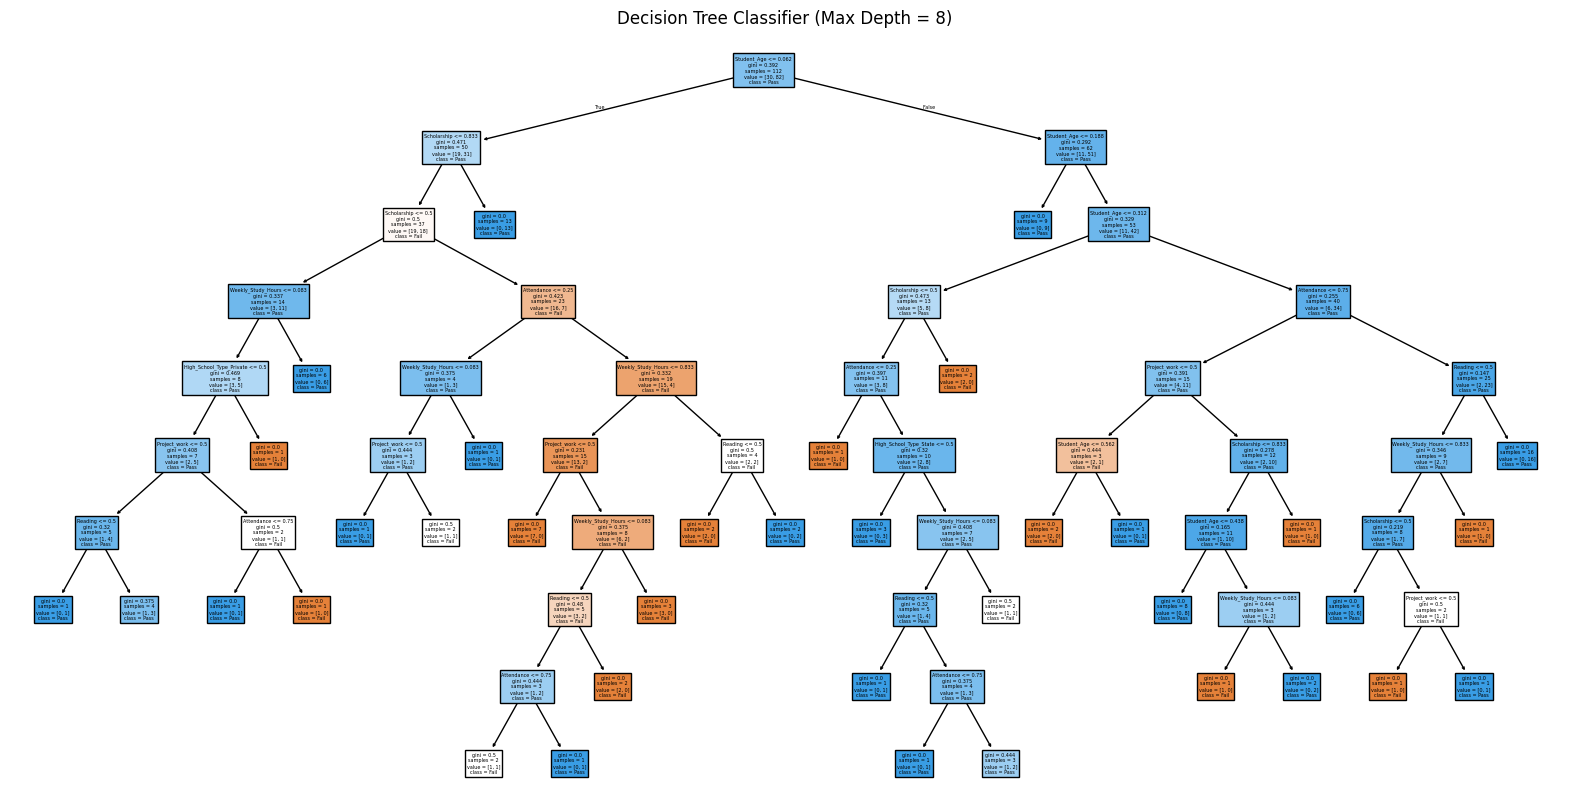

## Plot Accuracy vs. Tree Depth

### Subtask:
Generate a plot to visualize how the accuracy of the Decision Tree Classifier changes with different `max_depth` values.


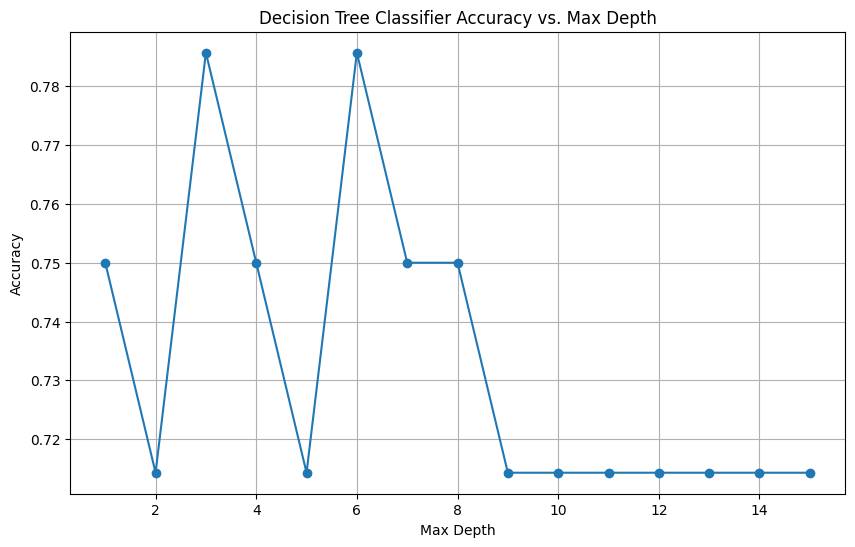

In [ ]:
import matplotlib.pyplot as plt

# Create an empty list to store accuracy scores
accuracies = []

# Define a range of max_depth values to test
max_depth_range = range(1, 16) # From 1 to 15

# Loop through each max_depth in the defined range
for depth in max_depth_range:
    # Initialize a DecisionTreeClassifier with the current max_depth and random_state=42
    dt_classifier = DecisionTreeClassifier(max_depth=depth, random_state=42)

    # Train the model
    dt_classifier.fit(X_train_selected, Y_train)

    # Make predictions on the test set
    Y_pred = dt_classifier.predict(X_test_selected)

    # Calculate the accuracy and append to the list
    accuracy = accuracy_score(Y_test, Y_pred)
    accuracies.append(accuracy)

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(max_depth_range, accuracies, marker='o', linestyle='-')

# Add a title and labels
plt.title('Decision Tree Classifier Accuracy vs. Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')

# Add a grid for better readability
plt.grid(True)

# Display the plot
plt.show()


Accuracy of Decision Tree Classifier with max_depth=6: 0.7857


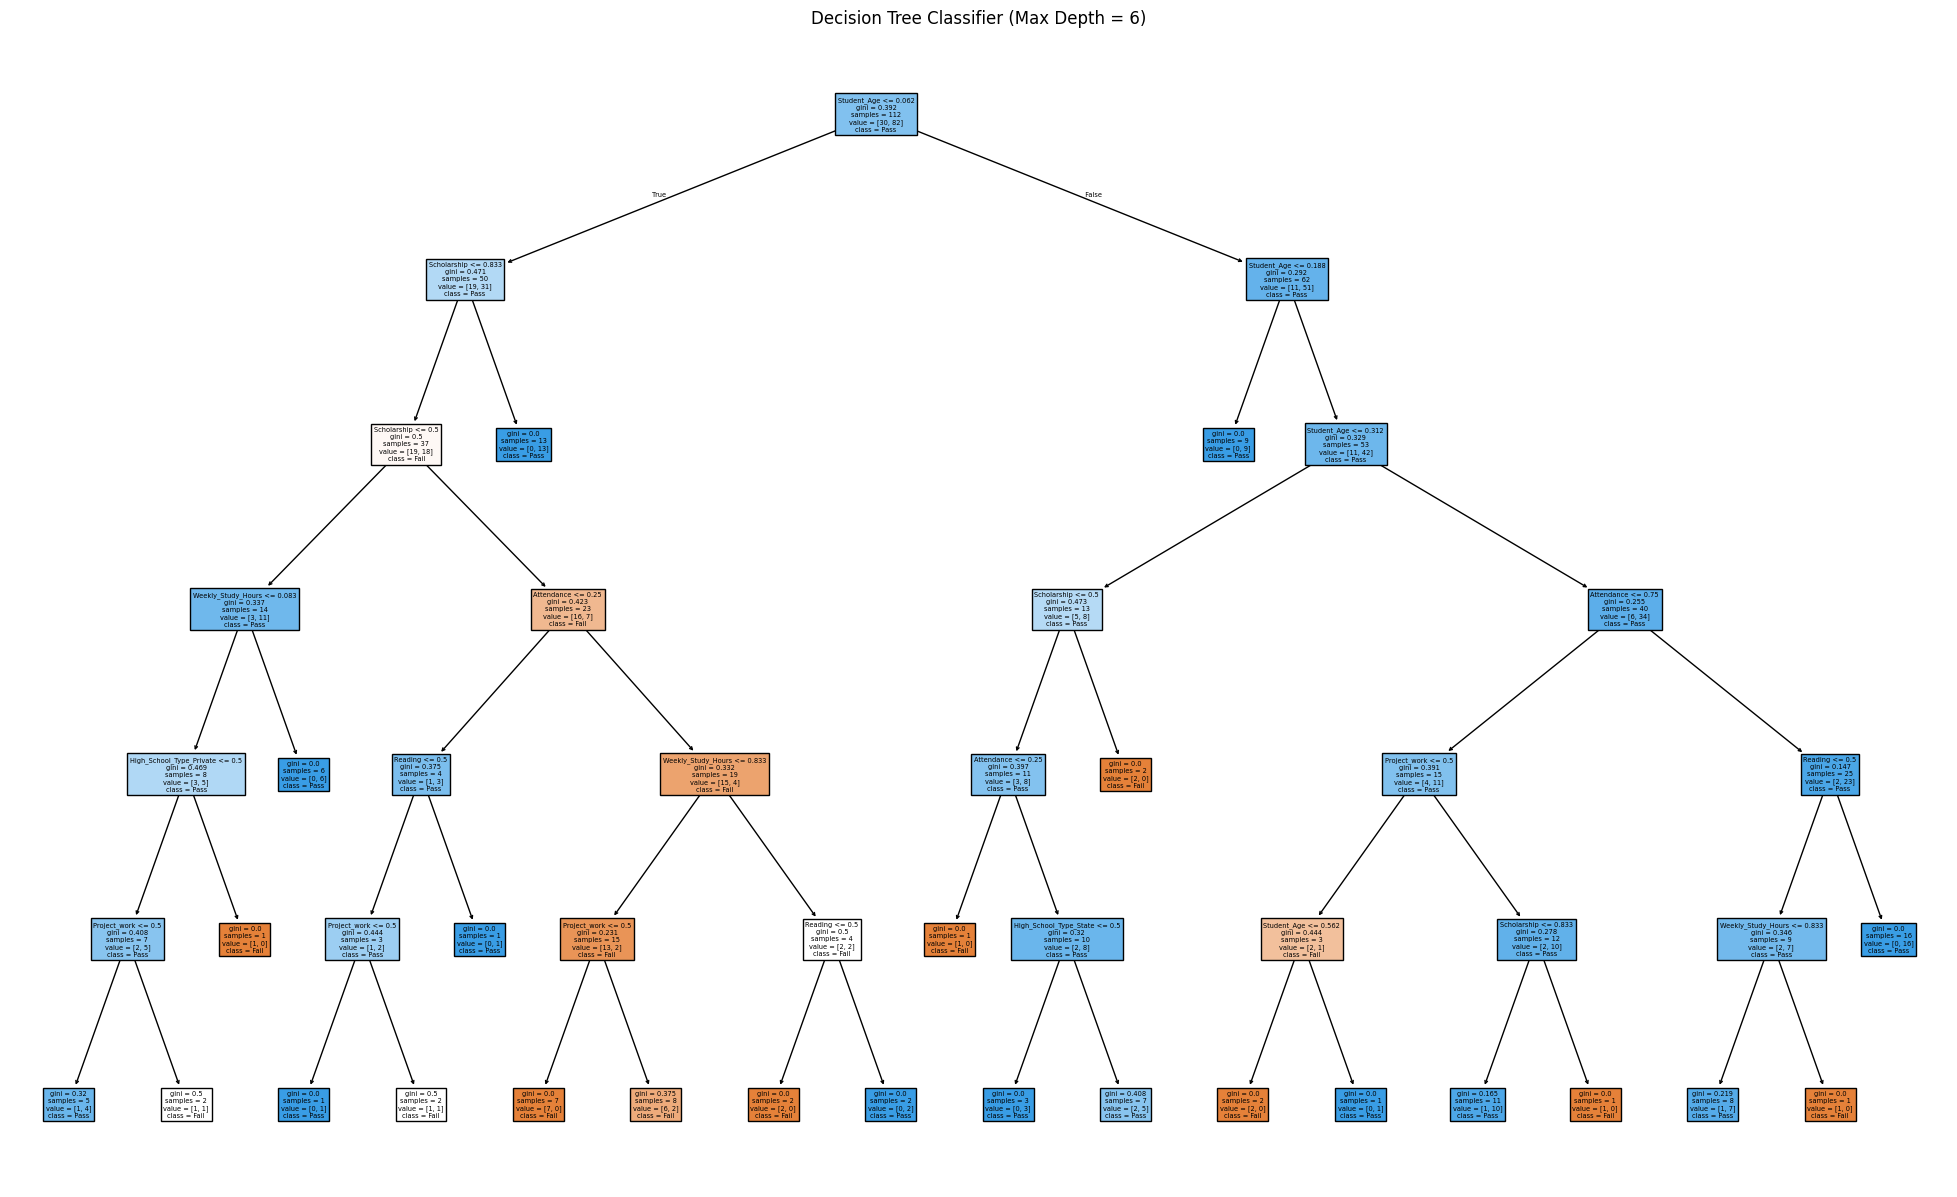

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Initialize the Decision Tree Classifier with max_depth = 6
dt_classifier_depth6 = DecisionTreeClassifier(max_depth=6, random_state=42)

# Train the model
dt_classifier_depth6.fit(X_train_selected, Y_train)

# Make predictions on the test set
Y_pred_depth6 = dt_classifier_depth6.predict(X_test_selected)

# Calculate the accuracy
accuracy_depth6 = accuracy_score(Y_test, Y_pred_depth6)

# Print the accuracy
print(f"Accuracy of Decision Tree Classifier with max_depth=6: {accuracy_depth6:.4f}")

# Plot the decision tree
plt.figure(figsize=(25,15))
plot_tree(dt_classifier_depth6, filled=True, feature_names=X_train_selected.columns.tolist(), class_names=['Fail', 'Pass'])
plt.title("Decision Tree Classifier (Max Depth = 6)")
plt.show()